### 导入数据

In [1]:
# 导包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 导入数据
df = pd.read_csv(r'E:\CDA数据分析就业班\10.机器学习\进阶算法\data&code\weather.csv',index_col=0)
pd.set_option('max_columns',100)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No


In [3]:
df.shape

(142193, 22)

In [4]:
#抽取5000条样本进行后续处理
weather = df.sample(n=5000,random_state=0)   # 提取的索引是打乱的
weather.index = range(weather.shape[0])      # 重置索引
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,2012-10-09,Cairns,17.4,29.0,0.0,3.6,11.1,NNE,33.0,SE,NNE,11.0,19.0,63.0,61.0,1013.1,1008.9,1.0,0.0,26.1,27.8,No
1,2011-05-24,Bendigo,6.8,14.4,0.8,0.8,NaN,S,46.0,SW,S,17.0,22.0,80.0,55.0,1010.2,1012.4,5.0,4.0,10.4,12.7,No
2,2009-08-06,Walpole,10.1,15.4,14.6,NaN,NaN,WSW,31.0,SW,SSE,13.0,9.0,70.0,61.0,1014.4,1016.1,NaN,NaN,12.3,13.0,No
3,2009-03-06,Perth,14.4,33.4,0.0,8.0,11.6,SW,41.0,ESE,SW,9.0,17.0,40.0,23.0,1019.2,1016.6,1.0,0.0,23.0,32.3,No
4,2010-07-02,AliceSprings,6.8,14.3,10.0,0.2,7.3,E,28.0,ENE,ESE,15.0,13.0,92.0,47.0,1027.6,1024.4,7.0,1.0,7.3,13.7,No


In [5]:
weather.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainTomorrow'],
      dtype='object')

In [6]:
weather.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainTomorrow      object
dtype: object

In [7]:
#每个变量value_counts()  unique()  初步探索数据

In [8]:
# 查看整体信息
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
Date             5000 non-null object
Location         5000 non-null object
MinTemp          4968 non-null float64
MaxTemp          4986 non-null float64
Rainfall         4937 non-null float64
Evaporation      2813 non-null float64
Sunshine         2592 non-null float64
WindGustDir      4640 non-null object
WindGustSpeed    4642 non-null float64
WindDir9am       4650 non-null object
WindDir3pm       4854 non-null object
WindSpeed9am     4951 non-null float64
WindSpeed3pm     4896 non-null float64
Humidity9am      4947 non-null float64
Humidity3pm      4869 non-null float64
Pressure9am      4459 non-null float64
Pressure3pm      4458 non-null float64
Cloud9am         3123 non-null float64
Cloud3pm         2989 non-null float64
Temp9am          4974 non-null float64
Temp3pm          4895 non-null float64
RainTomorrow     5000 non-null object
dtypes: float64(16), object(6)
memory usa

In [9]:
# 分别提取特征矩阵和标签
X = weather.iloc[:,:-1]
Y = weather.iloc[:,-1]

In [10]:
np.unique(Y)

array(['No', 'Yes'], dtype=object)

In [11]:
X.shape

(5000, 21)

In [12]:
# 查看缺失值比例（各个特征的缺失值比例）
X.isnull().mean()

Date             0.0000
Location         0.0000
MinTemp          0.0064
MaxTemp          0.0028
Rainfall         0.0126
Evaporation      0.4374
Sunshine         0.4816
WindGustDir      0.0720
WindGustSpeed    0.0716
WindDir9am       0.0700
WindDir3pm       0.0292
WindSpeed9am     0.0098
WindSpeed3pm     0.0208
Humidity9am      0.0106
Humidity3pm      0.0262
Pressure9am      0.1082
Pressure3pm      0.1084
Cloud9am         0.3754
Cloud3pm         0.4022
Temp9am          0.0052
Temp3pm          0.0210
dtype: float64

### 切分数据集 探索标签

In [13]:
# 切分训练集和测试集
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.3,random_state=420)

In [14]:
# 恢复索引
for i in [Xtrain,Xtest,Ytrain,Ytest]:
    i.index = range(i.shape[0])

In [15]:
# 通过Xtrain.head()进行探索

In [16]:
# 先划分数据集，对数据集的操作对测试集也要做相同的，比如填补训练集均值，那测试集也要填补训练集的均值

In [17]:
# 查看是否有样本不均衡问题
Ytrain.value_counts()

No     2710
Yes     790
Name: RainTomorrow, dtype: int64

In [18]:
Ytest.value_counts()

No     1137
Yes     363
Name: RainTomorrow, dtype: int64

In [19]:
# 看到训练集中存在样本不均衡问题，是否存在看容忍能力

In [20]:
# 对标签进行编码
from sklearn.preprocessing import LabelEncoder # 标签专用处理包
encoder = LabelEncoder().fit(Ytrain)           # 由于还要做test，所以将fit和transform分开
encoder.transform(Ytrain)
encoder.transform(Ytest)

array([0, 0, 0, ..., 0, 0, 1])

In [21]:
encoder.classes_  # 查看对应编码  按照首字母排列 

array(['No', 'Yes'], dtype=object)

In [22]:
from sklearn.preprocessing import OrdinalEncoder  # 特征编码专用包

In [23]:
#fit得到的是一个模型，如果得到的模型要用于不同对象fit和transform分开
#如果fit得到的模型只用在一个对象，可以用fit_transform()

<!-- 关于fit/transform/fit_transform
fit：得到一个模型，如果想把模型用到不同的对象上，需要fit和transform分开。
如果fit得到的模型用在同一个对象上，可以用fit_transform() -->

In [24]:
Ytrain = pd.DataFrame(encoder.transform(Ytrain))
Ytest = pd.DataFrame(encoder.transform(Ytest))

In [25]:
Ytrain.head()

,0
0,0
1,0
2,1
3,0
4,0


In [26]:
Ytest.head()

,0
0,0
1,0
2,0
3,0
4,0


### 探索特征

In [27]:
#描述性统计
Xtrain.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
MinTemp,3477.0,12.340236,6.384294,-6.9,-2.024,2.1,4.3,7.700,12.1,17.0,20.9,25.824,29.1
MaxTemp,3492.0,23.232904,6.992256,-4.1,8.900,12.7,14.6,18.200,22.7,28.1,32.8,39.600,43.7
Rainfall,3460.0,2.106618,6.570495,0.0,0.000,0.0,0.0,0.000,0.0,0.8,6.0,35.400,102.0
Evaporation,1986.0,5.398489,3.837948,0.0,0.400,1.0,1.4,2.725,4.8,7.4,9.8,17.430,52.4
Sunshine,1835.0,7.723869,3.691531,0.0,0.000,0.4,2.0,5.100,8.5,10.6,12.0,13.400,14.3
WindGustSpeed,3254.0,39.878611,13.492322,9.0,15.000,20.0,24.0,31.000,39.0,46.0,57.0,81.000,115.0
WindSpeed9am,3470.0,13.924784,8.861956,0.0,0.000,0.0,4.0,7.000,13.0,19.0,26.0,39.000,52.0
WindSpeed3pm,3426.0,18.765032,8.915825,0.0,2.000,6.0,7.0,13.000,19.0,24.0,30.0,43.000,78.0
Humidity9am,3460.0,68.844509,18.918369,5.0,18.000,35.0,44.0,57.000,70.0,83.0,94.0,100.000,100.0
Humidity3pm,3405.0,51.628781,20.705426,1.0,9.000,17.0,24.0,37.000,52.0,65.0,79.6,97.960,100.0


In [28]:
Xtest.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
MinTemp,1491.0,12.211335,6.458887,-6.3,-2.500,1.50,3.90,7.6,12.2,16.800,20.70,25.610,28.5
MaxTemp,1494.0,23.330857,7.380122,-0.6,7.686,12.60,14.40,18.0,22.7,28.775,33.50,40.500,44.4
Rainfall,1477.0,2.338456,8.114066,0.0,0.000,0.00,0.00,0.0,0.0,0.800,6.20,31.632,164.2
Evaporation,827.0,5.492745,4.007532,0.0,0.200,0.80,1.40,2.6,4.8,7.600,10.40,16.000,58.5
Sunshine,757.0,7.756803,3.815881,0.0,0.000,0.48,1.66,4.9,8.6,10.700,12.30,13.400,14.0
WindGustSpeed,1388.0,40.164986,14.144410,11.0,15.000,20.00,24.00,30.0,39.0,48.000,57.00,87.000,102.0
WindSpeed9am,1481.0,14.135719,9.018514,0.0,0.000,0.00,4.00,7.0,13.0,19.000,26.00,37.400,72.0
WindSpeed3pm,1470.0,18.759184,9.002335,0.0,2.000,6.00,8.80,13.0,19.0,24.000,30.00,44.620,65.0
Humidity9am,1487.0,67.854069,19.342026,8.0,16.860,32.30,42.60,56.0,68.0,83.000,94.00,100.000,100.0
Humidity3pm,1464.0,50.962432,21.100400,4.0,8.000,15.00,23.00,35.0,52.0,65.000,79.00,97.370,100.0


In [29]:
# 将数值型和文本型分开处理

In [30]:
Xtrain.mean()  # 只会根据数值型计算，得到index是所有的数值名

MinTemp            12.340236
MaxTemp            23.232904
Rainfall            2.106618
Evaporation         5.398489
Sunshine            7.723869
WindGustSpeed      39.878611
WindSpeed9am       13.924784
WindSpeed3pm       18.765032
Humidity9am        68.844509
Humidity3pm        51.628781
Pressure9am      1017.538520
Pressure3pm      1015.140542
Cloud9am            4.463624
Cloud3pm            4.540132
Temp9am            17.058115
Temp3pm            21.671979
dtype: float64

In [31]:
col = Xtrain.mean().index

In [32]:
len(col)  # 实际是14个 因为云层遮蔽属于分类型

16

In [33]:
# 异常值
## 常用为3倍标准差，99.75%

In [34]:
Xtrain.mean()                                                     # 返回每一列均值
(Xtrain.loc[:,col]-Xtrain.mean())/Xtrain.std()                    # 用到np中的广播
np.abs((Xtrain.loc[:,col]-Xtrain.mean())/Xtrain.std())            # 求绝对值
np.abs((Xtrain.loc[:,col]-Xtrain.mean())/Xtrain.std())>3          # 进行判断
(np.abs((Xtrain.loc[:,col]-Xtrain.mean())/Xtrain.std())>3).sum()  # 每列异常值个数

MinTemp           1
MaxTemp           8
Rainfall         76
Evaporation      22
Sunshine          0
WindGustSpeed    37
WindSpeed9am     34
WindSpeed3pm     21
Humidity9am      13
Humidity3pm       0
Pressure9am      12
Pressure3pm      10
Cloud9am          0
Cloud3pm          0
Temp9am           4
Temp3pm           9
dtype: int64

In [35]:
(np.abs((Xtrain.loc[:,col] -Xtrain.mean())/Xtrain.std())>3).sum()/Xtrain.shape[0] #每列异常值比例

MinTemp          0.000286
MaxTemp          0.002286
Rainfall         0.021714
Evaporation      0.006286
Sunshine         0.000000
WindGustSpeed    0.010571
WindSpeed9am     0.009714
WindSpeed3pm     0.006000
Humidity9am      0.003714
Humidity3pm      0.000000
Pressure9am      0.003429
Pressure3pm      0.002857
Cloud9am         0.000000
Cloud3pm         0.000000
Temp9am          0.001143
Temp3pm          0.002571
dtype: float64

In [36]:
#少数存在，于是采取删除的策略
#注意如果删除特征矩阵，则必须连对应的标签一起删除，特征矩阵的行和标签的行必须要一一对应
#提取出所有训练集所有异常值的索引

In [37]:
# 删除异常值
deltrain = []
for i in col:
    bool_ = np.abs((Xtrain.loc[:,i]-Xtrain.loc[:,i].mean())/Xtrain.loc[:,i].std())>3
    ind = Xtrain[bool_].index
    deltrain.extend(list(ind))
# 注意列表中append和extend区别 [1,2,3] [5,6];append[1,2,3,[5,6]];extend[1,2,3,5,6]

In [38]:
# deltrain会出现重复值
deltrain1 = list(set(deltrain)) 

In [39]:
# 不要立即删除，需要对test进行同样的操作
# 查看测试纸各列异常值，注意用训练值的标准差
(np.abs((Xtest.loc[:,col]-Xtrain.mean())/Xtrain.std())>3).sum()/Xtest.shape[0]

MinTemp          0.000000
MaxTemp          0.004000
Rainfall         0.024667
Evaporation      0.004667
Sunshine         0.000000
WindGustSpeed    0.013333
WindSpeed9am     0.007333
WindSpeed3pm     0.010000
Humidity9am      0.004667
Humidity3pm      0.000000
Pressure9am      0.004000
Pressure3pm      0.004000
Cloud9am         0.000000
Cloud3pm         0.000000
Temp9am          0.000667
Temp3pm          0.005333
dtype: float64

In [40]:
# 最多20%，选择删除
#提取出测试集的所有异常值的索引
deltest = []
for i in col:
    bool_ = np.abs((Xtest.loc[:,i] - Xtrain.loc[:,i].mean())/Xtrain.loc[:,i].std())>3
    ind = Xtest[bool_].index
    deltest.extend(list(ind))

In [41]:
#去重之后有异常值的行索引
deltest1 = list(set(deltest))
len(deltest1)

90

In [42]:
# 删除异常值
## 可以用del和drop，但是del每次只能删除一个，所以用drop。注意特征和标签都要删除
Xtrain = Xtrain.drop(index=deltrain1)
Ytrain = Ytrain.drop(index=deltrain1)
Xtest = Xtest.drop(index=deltest1)
Ytest = Ytest.drop(index=deltest1)

In [43]:
print(Xtrain.shape,Xtest.shape,Ytrain.shape,Ytest.shape)

(3301, 21) (1410, 21) (3301, 1) (1410, 1)


In [44]:
#进行任何行删除之后，千万记得要恢复索引
for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0])

In [45]:
# 查看Xtrain.head()  Xtest.head()  Ytrain.head()  Ytest.head()

### 处理困难特征：日期

In [46]:
# 如果认为日期没有影响可以直接删除，进行探索

In [47]:
 # Xtrain.Date.value_counts() 可以看到有些日期是重复的，为什么呢？

In [48]:
sum(Xtrain.Date == '2015-11-06')

6

In [49]:
Xtrain[Xtrain.Date == '2015-11-06']  # 不是重复值

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
138,2015-11-06,MountGambier,12.4,16.5,1.6,1.8,3.7,WSW,39.0,SW,SW,17.0,26.0,96.0,64.0,1013.3,1014.2,8.0,7.0,12.6,15.0
1204,2015-11-06,CoffsHarbour,20.1,28.3,7.2,NaN,NaN,NE,46.0,NNE,NE,17.0,31.0,81.0,66.0,1010.9,1006.4,NaN,NaN,23.3,25.6
1854,2015-11-06,Ballarat,12.6,15.0,1.4,NaN,NaN,WSW,35.0,SW,WSW,17.0,22.0,100.0,99.0,1010.2,1010.9,7.0,8.0,12.8,14.8
2332,2015-11-06,MountGinini,7.5,10.8,16.0,NaN,NaN,W,43.0,W,W,15.0,11.0,97.0,97.0,NaN,NaN,NaN,NaN,8.5,9.7
2732,2015-11-06,Newcastle,17.7,30.0,2.0,NaN,NaN,NaN,NaN,N,NaN,9.0,NaN,75.0,NaN,NaN,NaN,5.0,NaN,24.0,NaN
2911,2015-11-06,Launceston,15.8,26.2,5.0,NaN,NaN,NNW,35.0,NNW,NNW,4.0,20.0,88.0,66.0,NaN,NaN,7.0,8.0,17.9,24.1


In [50]:
# 查看重复值
Xtrain.duplicated().sum()
# 删除重复值用：drop_duplicates()

0

In [51]:
# 查看日期种类
print(len(Xtrain.Date.unique()))
print(len(set(Xtrain.Date)))
print(Xtrain.Date.value_counts().count())

2025
2025
2025


In [52]:
# 超过七个变量，sklearn会认为是连续的，随意不能编码

In [53]:
# 建立今天是否下雨的变量

In [54]:
# 查看前20条数据 Xtrain["Rainfall"].head(20)
# 查看Rainfall有无缺失值
Xtrain.Rainfall.isnull().sum()

38

查看是否有空值，自己做时不容易想到

In [55]:
Xtrain.loc[Xtrain["Rainfall"] >= 1,"RainToday"] = "Yes"
Xtrain.loc[Xtrain["Rainfall"] < 1,"RainToday"] = "No"
Xtrain.loc[Xtrain["Rainfall"] == np.nan,"RainToday"] = np.nan

In [56]:
print(Xtrain['RainToday'].value_counts())
print(Xtrain['RainToday'].value_counts().sum())
print(Xtrain.shape[0])

No     2555
Yes     708
Name: RainToday, dtype: int64
3263
3301


In [57]:
# 对Xtest进行操作
Xtest.loc[Xtest["Rainfall"] >= 1,"RainToday"] = "Yes"
Xtest.loc[Xtest["Rainfall"] < 1,"RainToday"] = "No"
Xtest.loc[Xtest["Rainfall"] == np.nan,"RainToday"] = np.nan

In [58]:
# 查看.head()

In [59]:
# 日期本身所在的月份会影响下雨所以进行操作

In [60]:
# 提取月份
print(Xtrain.loc[0,'Date'])
print(Xtrain.loc[0,'Date'].split('-'))
print(Xtrain.loc[0,'Date'].split('-')[1])

2016-03-14
['2016', '03', '14']
03


In [61]:
# 用for循环速度太慢，用内置的函数apply
Xtrain['Date'] = Xtrain['Date'].apply(lambda x:int(x.split('-')[1]))

In [62]:
# 如果是新建一列，删除Date，新建的列在表中的最后，所以用rename
Xtrain.rename(columns={'Date':'Month'},inplace=True)

In [63]:
Xtest["Date"] = Xtest["Date"].apply(lambda x:int(x.split("-")[1]))
Xtest = Xtest.rename(columns={"Date":"Month"})

### 处理分类型变量的缺失值

通常分类变量填充众数，连续变量用平均值；也可以用随机森林填充

In [64]:
Xtrain.dtypes

Month              int64
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
dtype: object

In [65]:
# 找出分类型变量的特征名
cate = Xtrain.columns[Xtrain.dtypes=='object']
print(cate)
print(type(cate))

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], dtype='object')
<class 'pandas.core.indexes.base.Index'>


In [66]:
# 所以要变成列表
cate = Xtrain.columns[Xtrain.dtypes=='object'].tolist()
print(cate)
print(type(cate))

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
<class 'list'>


In [67]:
#除了特征类型为"object"的特征们，还有虽然用数字表示，但是本质为分类型特征的云层遮蔽程度
cloud = ["Cloud9am","Cloud3pm"]
cate = cate + cloud
cate

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'Cloud9am',
 'Cloud3pm']

In [68]:
#对于分类型特征，使用众数来进行填补
from sklearn.impute import SimpleImputer

In [69]:
si = SimpleImputer(missing_values=np.nan,strategy="most_frequent") # 实例化模型

In [70]:
#注意，使用训练集数据来训练我们的填补器，本质是在生成训练集中的众数
si.fit(Xtrain.loc[:,cate])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='most_frequent', verbose=0)

In [71]:
#然后用训练集中的众数来同时填补训练集和测试集
Xtrain.loc[:,cate] = si.transform(Xtrain.loc[:,cate])
Xtest.loc[:,cate] = si.transform(Xtest.loc[:,cate])

In [72]:
# 确认训练集和测试中有无缺失值
print(Xtrain.loc[:,cate].isnull().sum())
print('-----------------')
print(Xtest.loc[:,cate].isnull().sum())

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
Cloud9am       0
Cloud3pm       0
dtype: int64
-----------------
Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
Cloud9am       0
Cloud3pm       0
dtype: int64


### 对分类型变量进行编码

In [73]:
#将所有的分类型变量编码为数字，一个类别是一个数字
from sklearn.preprocessing import OrdinalEncoder   #特征专用编码包，输入必须为二维及以上
oe = OrdinalEncoder()                              #实例化

In [74]:
#利用训练集进行fit
oe = oe.fit(Xtrain.loc[:,cate])   #相当于把每一列编码，并记录对应关系
# 这种编码对模型有影响，可以用onehot将列增多，计算难度变大，所以一般先不用，如果列本身很多，不建议用onehot

In [75]:
Xtrain.loc[:,cate] = oe.transform(Xtrain.loc[:,cate])
Xtest.loc[:,cate] = oe.transform(Xtest.loc[:,cate])

如果此处出现报错，说明test中出现了train未出现的类别，可以将新出现的用-1进行代替

In [76]:
Xtrain.loc[:,cate].head()  # 可以看到有的数值比较大，可以先跑，然后再根据结果调整

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,Cloud9am,Cloud3pm
0,45.0,9.0,7.0,9.0,0.0,7.0,3.0
1,15.0,2.0,3.0,9.0,0.0,7.0,1.0
2,44.0,8.0,12.0,11.0,1.0,8.0,7.0
3,41.0,12.0,0.0,12.0,0.0,7.0,1.0
4,17.0,6.0,10.0,3.0,0.0,6.0,1.0


### 处理连续型变量缺失值

用算法填补时，不可解释；用算法填补运行时间可能会长。现实生活中用均值或中位数填补，现在选择均值填补

In [77]:
# 提取连续型变量的名字
## 不能用.mean()直接，因为前面已经进行编码了

In [78]:
col = Xtrain.columns.tolist()

In [79]:
for i in cate:
    col.remove(i)
col

['Month',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [80]:
#实例化模型，填补策略为"mean"表示均值
impmean = SimpleImputer(missing_values=np.nan,strategy = "mean")

In [81]:
#用训练集来fit模型
impmean = impmean.fit(Xtrain.loc[:,col]) # 相当于计算每一列的均值

In [82]:
#分别在训练集和测试集上进行均值填补
Xtrain.loc[:,col] = impmean.transform(Xtrain.loc[:,col])
Xtest.loc[:,col] = impmean.transform(Xtest.loc[:,col])

In [83]:
# 确认是否还有缺失值

In [84]:
Xtrain.isnull().sum()

Month            0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

In [85]:
Xtest.isnull().sum()

Month            0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

### 处理量纲问题

In [86]:
# 查看是否存在量纲问题
Xtrain.describe().T

,count,mean,std,min,25%,50%,75%,max
Month,3301.0,6.360497,3.431097,1.0,3.000000,6.000000,9.0,12.0
Location,3301.0,23.456831,14.057405,0.0,11.000000,23.000000,35.0,48.0
MinTemp,3301.0,12.254912,6.291149,-5.3,7.700000,12.000000,16.8,29.1
MaxTemp,3301.0,23.285641,6.788046,3.4,18.300000,22.800000,28.1,42.9
Rainfall,3301.0,1.299081,3.327557,0.0,0.000000,0.000000,0.6,21.8
Evaporation,3301.0,5.173344,2.381357,0.0,4.200000,5.173344,5.2,16.6
Sunshine,3301.0,7.826516,2.627575,0.0,7.826516,7.826516,8.9,14.3
WindGustDir,3301.0,7.771584,4.520786,0.0,4.000000,9.000000,11.0,15.0
WindGustSpeed,3301.0,38.749267,11.634887,9.0,31.000000,38.749267,44.0,80.0
WindDir9am,3301.0,6.932445,4.501917,0.0,3.000000,7.000000,11.0,15.0


查看最大值，发现存在量纲不统一，这个操作不对分类型进行处理

In [87]:
col.remove('Month')

In [88]:
# 对连续型变量进行数据标准化
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()  # 实例化
ss = ss.fit(Xtrain.loc[:,col])  # 相当于生成每一列的均值和标准差
Xtrain.loc[:,col] = ss.transform(Xtrain.loc[:,col])
Xtest.loc[:,col] = ss.transform(Xtest.loc[:,col])

In [89]:
# 最后查看Xtrain.head()

In [90]:
# 将进行特征工程完毕的数据导出去，防止建模损坏
Xtrain.to_csv(r'E:\CDA数据分析就业班\10.机器学习\进阶算法\data&code\weather_Xtrain.csv',encoding='utf-8') #不要忘记编码
Xtest.to_csv(r'E:\CDA数据分析就业班\10.机器学习\进阶算法\data&code\weather_Xtest.csv',encoding='utf-8')
Ytrain.to_csv(r'E:\CDA数据分析就业班\10.机器学习\进阶算法\data&code\weather_Ytrain.csv',encoding='utf-8')
Ytest.to_csv(r'E:\CDA数据分析就业班\10.机器学习\进阶算法\data&code\weather_Ytest.csv',encoding='utf-8')

### 建立模型及模型评估

In [91]:
from time import time
import datetime
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, recall_score

In [92]:
# 查看标签
Ytrain.head(2)

,0
0,0
1,0


标签为二维的，sklearn要求标签是一维

In [93]:
# 对标签进行转换
Ytrain = Ytrain.iloc[:,0].values

In [94]:
Ytest = Ytest.iloc[:,0].ravel()

In [96]:
print(type(Ytrain),Ytrain.shape)
print(type(Ytest),Ytest.shape)

<class 'numpy.ndarray'> (3301,)
<class 'numpy.ndarray'> (1410,)


In [97]:
#核函数学习曲线
for kernel in ["linear","poly","rbf","sigmoid"]:
    times = time()
    clf = SVC(kernel = kernel
                ,gamma="auto"
                ,degree = 1           # 多项式核函数如果是高次，运行缓慢，开始先设为1
                ).fit(Xtrain, Ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest)
    recall = recall_score(Ytest, result)  # 少数类的预测准确率
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))    # 注意y_score是决策距离，auc的值越接近0.5越差
    print("%s 's testing accuracy %f, recall is %f', auc is %f" %(kernel,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

linear 's testing accuracy 0.828369, recall is 0.386792', auc is 0.851239
00:01:425976
poly 's testing accuracy 0.826241, recall is 0.364780', auc is 0.852003
00:00:317865
rbf 's testing accuracy 0.798582, recall is 0.125786', auc is 0.751071
00:00:748938
sigmoid 's testing accuracy 0.743262, recall is 0.037736', auc is 0.438671
00:00:379809


模型的准确度和auc面积还是勉勉强强，但是每个核函数下的recall都不太高。相比之下，其实线性模型的效果是最好的。
在这种状况下，我们要向着什么方向
进行调参呢？我们最想要的是什么？
我们可以有不同的目标：
一，我希望不计一切代价判断出少数类，得到最高的recall。
二，我们希望追求最高的预测准确率，一切目的都是为了让accuracy更高，我们不在意recall或者AUC。
三，我们希望达到recall，ROC和accuracy之间的平衡，不追求任何一个也不牺牲任何一个。

### 模型调参

#### 追求最高的recall

In [98]:
for kernel in ["linear","poly","rbf","sigmoid"]:
    times = time()
    clf = SVC(kernel = kernel
                ,gamma="auto"
                ,degree = 1           # 多项式核函数如果是高次，运行缓慢，开始先设为1
                ,class_weight='balanced'   # 将少数类样本增大
             ).fit(Xtrain, Ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest)
    recall = recall_score(Ytest, result)  # 少数类的预测准确率
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))    # 注意y_score是决策距离，auc的值越接近0.5越差
    print("%s 's testing accuracy %f, recall is %f', auc is %f" %(kernel,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

linear 's testing accuracy 0.790071, recall is 0.761006', auc is 0.856095
00:01:829063
poly 's testing accuracy 0.785816, recall is 0.742138', auc is 0.855824
00:00:485082
rbf 's testing accuracy 0.792908, recall is 0.380503', auc is 0.754343
00:01:631364
sigmoid 's testing accuracy 0.755319, recall is 0.015723', auc is 0.439958
00:01:159088


线性核函数的准确率和recall都高，锁定线性核函数，继续增加少数类样本权重

In [99]:
times = time()
clf = SVC(kernel = "linear"
          ,gamma="auto"
          ,class_weight = {1:10} #注意，这里写的其实是，类别1：10，隐藏了类别0：1这个比例
         ).fit(Xtrain, Ytrain)
result = clf.predict(Xtest)
score = clf.score(Xtest,Ytest)
recall = recall_score(Ytest, result)
auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
print("testing accuracy %f, recall is %f', auc is %f" %(score,recall,auc))
print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

testing accuracy 0.641135, recall is 0.930818', auc is 0.857609
00:03:934202


准确度下降，但是recall和auc上升明显。说明少数类捕捉效果明显，但是损害了很多多数类。如果想追求recall和auc可以继续做个学习曲线进行优化聚焦

#### 追求准确率

实际二分类中仅追求准确率不顾及少数类没有意义，这里为了练习

In [101]:
valuec = pd.Series(Ytest).value_counts()
print(valuec)
print(valuec[0]/valuec.sum())

0    1092
1     318
dtype: int64
0.774468085106383


初步判断，可以认为我们其实已经将大部分的多数类判断正确了，所以才能够得到现在的正确率。为
了证明我们的判断，我们可以使用混淆矩阵来计算我们的特异度，如果特异度非常高，则证明多数类上
已经很难被操作了。

In [102]:
#查看模型的特异度
from sklearn.metrics import confusion_matrix as CM
clf = SVC(kernel = "linear",
          gamma="auto"
         ).fit(Xtrain, Ytrain)

result = clf.predict(Xtest)
cm = CM(Ytest,result,labels=(1,0))
cm

array([[ 123,  195],
       [  47, 1045]], dtype=int64)

In [103]:
cm[1,1]

1045

In [104]:
cm[1,:].sum()

1092

In [106]:
specificity = cm[1,1]/cm[1,:].sum()
specificity

0.956959706959707

特异度非常高，此时此刻如果要求模型将所有的类都判断为0，则已经被判断正确的少数
类会被误伤，整体的准确率一定会下降。而如果我们希望通过让模型捕捉更多少数类来提升精确率的
话，却无法实现，因为一旦我们让模型更加倾向于少数类，就会有更多的多数类被判错。

可以试试看使用class_weight将模型向少数类的方向稍微调整，已查看我们是否有更多的空间来提升
我们的准确率。如果在轻微向少数类方向调整过程中，出现了更高的准确率，则说明模型还没有到极
限。

In [107]:
irange = np.linspace(0.01,0.05,10)
for i in irange:
    times = time()
    clf = SVC(kernel = "linear"
                ,gamma="auto"
                ,class_weight = {1:1+i}
                ).fit(Xtrain, Ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest)
    recall = recall_score(Ytest, result)
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
    print("under ratio 1:%f testing accuracy %f, recall is %f', auc is %f" %
    (1+i,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

under ratio 1:1.010000 testing accuracy 0.828369, recall is 0.389937', auc is 0.851216
00:01:375114
under ratio 1:1.014444 testing accuracy 0.828369, recall is 0.389937', auc is 0.851150
00:01:365879
under ratio 1:1.018889 testing accuracy 0.828369, recall is 0.393082', auc is 0.851262
00:02:478693
under ratio 1:1.023333 testing accuracy 0.828369, recall is 0.393082', auc is 0.851147
00:01:377786
under ratio 1:1.027778 testing accuracy 0.828369, recall is 0.393082', auc is 0.851251
00:01:487643
under ratio 1:1.032222 testing accuracy 0.829078, recall is 0.399371', auc is 0.851392
00:03:263787
under ratio 1:1.036667 testing accuracy 0.829787, recall is 0.399371', auc is 0.851395
00:01:420995
under ratio 1:1.041111 testing accuracy 0.827660, recall is 0.399371', auc is 0.851455
00:02:609816
under ratio 1:1.045556 testing accuracy 0.829078, recall is 0.405660', auc is 0.851311
00:01:469740
under ratio 1:1.050000 testing accuracy 0.829787, recall is 0.408805', auc is 0.851309
00:01:613505


最高准确度是82.97%，超过了我们之前什么都不做的时候得到的82.83%。可
见，模型还是有潜力的。我们可以继续细化我们的学习曲线来进行调整：

In [108]:
irange_ = np.linspace(0.03,0.04,10)
for i in irange_:
    times = time()
    clf = SVC(kernel = "linear"
                ,gamma="auto"
                ,class_weight = {1:1+i}
                ).fit(Xtrain, Ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest)
    recall = recall_score(Ytest, result)
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
    print("under ratio 1:%f testing accuracy %f, recall is %f', auc is %f" %(1+i,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

under ratio 1:1.030000 testing accuracy 0.829078, recall is 0.396226', auc is 0.851409
00:01:519197
under ratio 1:1.031111 testing accuracy 0.829078, recall is 0.399371', auc is 0.851444
00:02:681327
under ratio 1:1.032222 testing accuracy 0.829078, recall is 0.399371', auc is 0.851392
00:01:598495
under ratio 1:1.033333 testing accuracy 0.829078, recall is 0.399371', auc is 0.851424
00:02:729578
under ratio 1:1.034444 testing accuracy 0.829787, recall is 0.399371', auc is 0.851395
00:01:484092
under ratio 1:1.035556 testing accuracy 0.829787, recall is 0.399371', auc is 0.851398
00:01:981687
under ratio 1:1.036667 testing accuracy 0.829787, recall is 0.399371', auc is 0.851395
00:02:664430
under ratio 1:1.037778 testing accuracy 0.827660, recall is 0.396226', auc is 0.851314
00:01:571394
under ratio 1:1.038889 testing accuracy 0.827660, recall is 0.399371', auc is 0.851429
00:02:599832
under ratio 1:1.040000 testing accuracy 0.827660, recall is 0.399371', auc is 0.851461
00:01:473067


In [110]:
# 更换模型
## 由于是二分类，所以更换为逻辑回归
from sklearn.linear_model import LogisticRegression as LR
logclf = LR(solver="liblinear").fit(Xtrain, Ytrain)
logclf.score(Xtest,Ytest)

0.8312056737588652

In [114]:
score = []
C_range = np.linspace(1,5,10)
for C in C_range:
    logclf = LR(solver="liblinear",C=C).fit(Xtrain, Ytrain)
    score.append(logclf.score(Xtest,Ytest))
    print(C,logclf.score(Xtest,Ytest))

1.0 0.8312056737588652
1.4444444444444444 0.8312056737588652
1.8888888888888888 0.8312056737588652
2.333333333333333 0.8312056737588652
2.7777777777777777 0.8312056737588652
3.2222222222222223 0.8312056737588652
3.6666666666666665 0.8304964539007093
4.111111111111111 0.8297872340425532
4.555555555555555 0.8304964539007093
5.0 0.8304964539007093


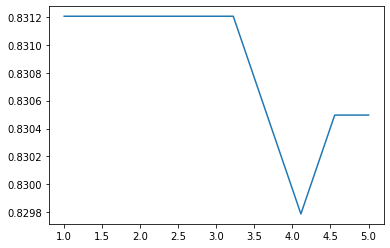

In [115]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(C_range,score)

#### 追求平衡

In [116]:
import matplotlib.pyplot as plt
C_range = np.linspace(0.01,20,20)
recallall = []
aucall = []
scoreall = []
for C in C_range:
    times = time()
    clf = SVC(kernel = "linear",C=C
                ,class_weight = "balanced").fit(Xtrain, Ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest)
    recall = recall_score(Ytest, result)
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
    recallall.append(recall)
    aucall.append(auc)
    scoreall.append(score)
    print("under C %f, testing accuracy is %f,recall is %f', auc is %f" %(C,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))


under C 0.010000, testing accuracy is 0.782979,recall is 0.745283', auc is 0.855853
00:00:388294
under C 1.062105, testing accuracy is 0.790071,recall is 0.761006', auc is 0.856100
00:01:899965
under C 2.114211, testing accuracy is 0.790071,recall is 0.761006', auc is 0.856069
00:04:278505
under C 3.166316, testing accuracy is 0.790780,recall is 0.764151', auc is 0.855985
00:05:364784
under C 4.218421, testing accuracy is 0.791489,recall is 0.767296', auc is 0.855977
00:06:555593
under C 5.270526, testing accuracy is 0.790780,recall is 0.767296', auc is 0.855994
00:10:374709
under C 6.322632, testing accuracy is 0.790780,recall is 0.767296', auc is 0.855956
00:10:851680
under C 7.374737, testing accuracy is 0.790780,recall is 0.767296', auc is 0.855861
00:13:572332
under C 8.426842, testing accuracy is 0.791489,recall is 0.767296', auc is 0.855841
00:14:286015
under C 9.478947, testing accuracy is 0.791489,recall is 0.767296', auc is 0.855804
00:16:896080
under C 10.531053, testing acc

0.8561003985532287 1.0621052631578947


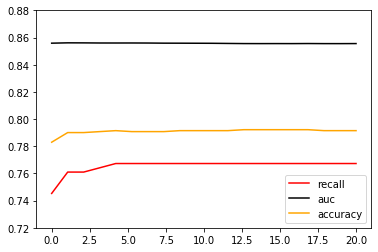

In [117]:
print(max(aucall),C_range[aucall.index(max(aucall))])
plt.figure()
plt.plot(C_range,recallall,c="red",label="recall")
plt.plot(C_range,aucall,c="black",label="auc")
plt.plot(C_range,scoreall,c="orange",label="accuracy")
plt.legend(loc=4)
plt.ylim([0.72,0.88])
plt.show()

首先，我们注意到，随着C值逐渐增大，模型的运行速度变得越来越慢。对于SVM这个本来运行就不
快的模型来说，巨大的C值会是一个比较危险的消耗。所以正常来说，我们应该设定一个较小的C值范围
来进行调整。
其次，C很小的时候，模型的各项指标都很低，但当C到1以上之后，模型的表现开始逐渐稳定，在C
逐渐变大之后，模型的效果并没有显著地提高。可以认为我们设定的C值范围太大了，然而再继续增大
或者缩小C值的范围，AUC面积也只能够在0.86上下进行变化了，调节C值不能够让模型的任何指标实现
质变。

In [118]:
# 最佳的C值带入模型
times = time()
clf = SVC(kernel = "linear",C=1.0621052631578947
            ,class_weight = "balanced"
            ).fit(Xtrain, Ytrain)
result = clf.predict(Xtest)
score = clf.score(Xtest,Ytest)
recall = recall_score(Ytest, result)
auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
print("testing accuracy %f,recall is %f', auc is %f" % (score,recall,auc))
print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

testing accuracy 0.790071,recall is 0.761006', auc is 0.856100
00:01:942840


这种情况下模型的准确率，Recall和AUC都没有太差，但是也没有太好，这也许就是模型
平衡后的一种结果

调整支持向量机本身的参数，已经不能够满足我们的需求了，要想让AUC面积更进一步，需要绘制ROC曲线，查看是否可以通过调整阈值来对这个模型进行改进。

In [119]:
# 调整ROC曲线阈值

In [120]:
from sklearn.metrics import roc_curve as ROC
import matplotlib.pyplot as plt
FPR, Recall, thresholds = ROC(Ytest,clf.decision_function(Xtest),pos_label=1)  # pos_label 关注样本的标签
area = roc_auc_score(Ytest,clf.decision_function(Xtest))

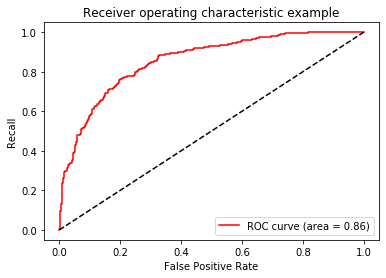

In [121]:
# 绘制ROC曲线
plt.figure()
plt.plot(FPR, Recall, color='red',                      # ROC曲线
         label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='black', linestyle='--') # 对角线
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [122]:
#求最佳阈值
maxindex = (Recall - FPR).tolist().index(max(Recall - FPR))
thresholds[maxindex]

-0.011916119080159437

In [124]:
print(type((Recall - FPR)))
print((Recall - FPR).shape)

<class 'numpy.ndarray'>
(330,)


In [126]:
# 选出的最佳阈值，我们来认为确定y_predict，并确定在这个阈值下的recall和准确度的值：

In [125]:
from sklearn.metrics import accuracy_score as AC
times = time()
clf = SVC(kernel = "linear",C=1.0621052631578947
            ,class_weight = "balanced"
            ).fit(Xtrain, Ytrain)

In [128]:
prob = pd.DataFrame(clf.decision_function(Xtest))
prob.loc[prob.iloc[:,0] >= thresholds[maxindex],"y_pred"]=1
prob.loc[prob.iloc[:,0] < thresholds[maxindex],"y_pred"]=0

In [129]:
#检查模型本身的准确度
score = AC(Ytest,prob.loc[:,"y_pred"].values)
recall = recall_score(Ytest, prob.loc[:,"y_pred"])
print("testing accuracy %f,recall is %f" % (score,recall))
print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

testing accuracy 0.788652,recall is 0.767296
02:10:401429


反而还不如我们不调整时的效果好。可见，如果我们追求平衡，那SVC本身的结果就已经非常接近最
优结果了。调节阈值，调节参数C和调节class_weight都不一定有效果。但整体来看，我们的模型不是
一个糟糕的模型，但这个结果如果提交到kaggle参加比赛是绝对不足够的。如果大家感兴趣，还可以更
加深入地探索模型，或者换别的方法来处理特征，以达到AUC面积0.9以上，或是准确度或recall都提升
到90%以上

In [130]:
# 数据预处理花费的时间最大
# 大公司划分：
# 数据提取--管数据库
# 数据清洗--一部分人
# 数据建模--算法工程师
# 模型上线--各方配合